In [35]:
import pandas as pd
import ClassificatorUtils as cls
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


In [29]:

csv_path = '../data/ACC.csv'
df_acc = pd.read_csv(csv_path)
df_acc = df_acc.drop([ 'ID', 'scenario', 'seed', 'Controller', 'numHumanCars', 'BeaconIntervalPlat', 'BeaconIntervalHuman', 'PacketSize', 'waitTime', 'DENMInterval'], axis=1)
df_acc = df_acc.dropna()
df_acc = df_acc.drop_duplicates()

csv_path = '../data/CACC_PLOEG.csv'
df = pd.read_csv(csv_path)
index_cacc = df.index[df['Controller'] != "CACC"].tolist()
df_cacc = df.drop(index_cacc)
index_ploeg = df.index[df['Controller'] != "PLOEG"].tolist()
df_ploeg = df.drop(index_ploeg)

df_cacc_ploeg = df.drop([ 'ID', 'scenario', 'seed'], axis=1)
df_cacc_ploeg = df_cacc_ploeg.dropna()
df_cacc_ploeg = df_cacc_ploeg.drop_duplicates()

df_cacc = df_cacc.drop([ 'ID', 'scenario', 'seed', 'Controller'], axis=1)
df_cacc = df_cacc.dropna()
df_cacc = df_cacc.drop_duplicates()

df_ploeg = df_ploeg.drop([ 'ID', 'scenario', 'seed', 'Controller'], axis=1)
df_ploeg = df_ploeg.dropna()
df_ploeg = df_ploeg.drop_duplicates()

f_names_acc = ['numPlatCars', 'spdLeader', 'DecelerationRate', 'Ctr_Param(Ploegh||Spacing)']
X_acc = df_acc[f_names_acc]
y_acc = df_acc['Collision']

f_names = ['numPlatCars', 'numHumanCars', 'spdLeader', 'BeaconIntervalPlat', 'BeaconIntervalHuman', 'DENMInterval', 'DecelerationRate', 'PacketSize', 'Ctr_Param(Ploegh||Spacing)', 'waitTime']
X_cacc = df_cacc[f_names]
y_cacc = df_cacc['Collision']

X_ploeg = df_ploeg[f_names]
y_ploeg = df_ploeg['Collision']

f_names_all = ['Controller', 'numPlatCars', 'numHumanCars', 'spdLeader', 'BeaconIntervalPlat', 'BeaconIntervalHuman', 'DENMInterval', 'DecelerationRate', 'PacketSize', 'Ctr_Param(Ploegh||Spacing)', 'waitTime']
X_cacc_ploeg = df_cacc_ploeg[f_names_all]
y_cacc_ploeg = df_cacc_ploeg['Collision']


In [30]:
def test_dec_tree_ploeg(X_train, y_train, X_test, y_test, X_train_std, X_test_std):
    leafs = 2
    column_names = ['Algorithm', 'Standarised', 'AccTrain', 'Acc', 'Prec', 'Recall', 'TN', 'FP', 'FN', 'TP', 'TimeMed', 'TimeMax', 'TimeMin', 'max_leaf_node']
    dt = DecisionTreeClassifier(class_weight="balanced", max_leaf_nodes=leafs).fit(X_train, y_train)
    cls.algor(dt, X_train_std, y_train, X_test_std, y_test, 'DecisionTree', True, column_names, [leafs])
    return dt

def test_dec_tree_cacc(X_train, y_train, X_test, y_test, X_train_std, X_test_std):
    leafs = 8
    column_names = ['Algorithm', 'Standarised', 'AccTrain', 'Acc', 'Prec', 'Recall', 'TN', 'FP', 'FN', 'TP', 'TimeMed', 'TimeMax', 'TimeMin', 'max_leaf_node']
    dt = DecisionTreeClassifier(class_weight="balanced", max_leaf_nodes=leafs).fit(X_train, y_train)
    cls.algor(dt, X_train_std, y_train, X_test_std, y_test, 'DecisionTree', True, column_names, [leafs])
    return dt

def test_dec_tree_acc(X_train, y_train, X_test, y_test, X_train_std, X_test_std):
    leafs = 45
    column_names = ['Algorithm', 'Standarised', 'AccTrain', 'Acc', 'Prec', 'Recall', 'TN', 'FP', 'FN', 'TP', 'TimeMed', 'TimeMax', 'TimeMin', 'max_leaf_node']
    dt = DecisionTreeClassifier(class_weight="balanced", max_leaf_nodes=leafs).fit(X_train, y_train)
    cls.algor(dt, X_train_std, y_train, X_test_std, y_test, 'DecisionTree', True, column_names, [leafs])
    return dt

Feature: numPlatCars, Score: 0.06927
Feature: spdLeader, Score: 0.07528
Feature: DecelerationRate, Score: 0.51494
Feature: Ctr_Param(Ploegh||Spacing), Score: 0.34051


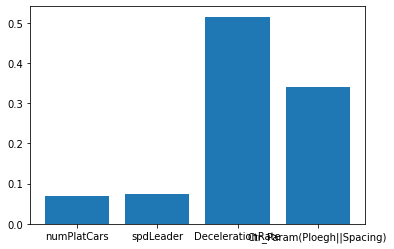

In [40]:
dt = cls.test_algorithms(X_acc, y_acc, test_dec_tree_acc)

importance = dt.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %s, Score: %.5f' % (f_names_acc[i],v))
# plot feature importance
plt.bar(f_names_acc, importance)
plt.show()

text_representation = tree.export_text(dt, feature_names=f_names_acc)
with open("../results/DT_ACC.log", "w") as fout:
    fout.write(text_representation)


Feature: numPlatCars, Score: 0.00000
Feature: numHumanCars, Score: 0.12053
Feature: spdLeader, Score: 0.68284
Feature: BeaconIntervalPlat, Score: 0.00000
Feature: BeaconIntervalHuman, Score: 0.00000
Feature: DENMInterval, Score: 0.09568
Feature: DecelerationRate, Score: 0.00000
Feature: PacketSize, Score: 0.00000
Feature: Ctr_Param(Ploegh||Spacing), Score: 0.00000
Feature: waitTime, Score: 0.10095


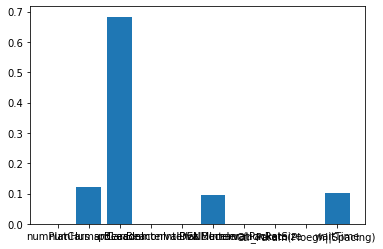

In [41]:
dt = cls.test_algorithms(X_cacc, y_cacc, test_dec_tree_cacc)

importance = dt.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %s, Score: %.5f' % (f_names[i],v))
# plot feature importance
plt.bar(f_names, importance)
plt.show()

text_representation = tree.export_text(dt, feature_names=f_names)
with open("../results/DT_CACC.log", "w") as fout:
    fout.write(text_representation)

Feature: numPlatCars, Score: 0.00000
Feature: numHumanCars, Score: 0.00000
Feature: spdLeader, Score: 0.00000
Feature: BeaconIntervalPlat, Score: 0.00000
Feature: BeaconIntervalHuman, Score: 1.00000
Feature: DENMInterval, Score: 0.00000
Feature: DecelerationRate, Score: 0.00000
Feature: PacketSize, Score: 0.00000
Feature: Ctr_Param(Ploegh||Spacing), Score: 0.00000
Feature: waitTime, Score: 0.00000


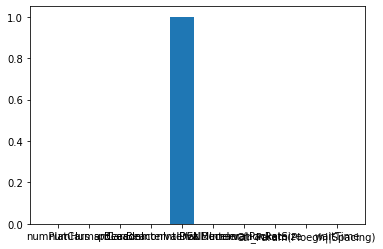

In [42]:
dt = cls.test_algorithms(X_ploeg, y_ploeg, test_dec_tree_ploeg)

importance = dt.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %s, Score: %.5f' % (f_names[i],v))
# plot feature importance
plt.bar(f_names, importance)
plt.show()

text_representation = tree.export_text(dt, feature_names=f_names)
with open("../results/DT_PLOEG.log", "w") as fout:
    fout.write(text_representation)